<a href="https://colab.research.google.com/github/divyanshuxpandey/Breast_cancer_analysis/blob/main/Breast_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set()
# Check available styles and choose a valid one
print(plt.style.available)
plt.style.use('ggplot') # 'ggplot' is a valid style, did you mean this?

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
df = pd.read_csv('/content/breast_cancer.csv')

In [ ]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info

<bound method DataFrame.info of                                                                                                                                                                                                             569  \
17.99 10.38 122.80 1001.0 0.11840 0.27760 0.30010 0.14710 0.2419 0.07871 1.0950 0.9053 8.589 153.40 0.006399 0.04904 0.05373 0.01587 0.03003 0.006193 25.380 17.33 184.60 2019.0 0.16220 0.66560 0.7119  0.2654   
20.57 17.77 132.90 1326.0 0.08474 0.07864 0.08690 0.07017 0.1812 0.05667 0.5435 0.7339 3.398 74.08  0.005225 0.01308 0.01860 0.01340 0.01389 0.003532 24.990 23.41 158.80 1956.0 0.12380 0.18660 0.2416  0.1860   
19.69 21.25 130.00 1203.0 0.10960 0.15990 0.19740 0.12790 0.2069 0.05999 0.7456 0.7869 4.585 94.03  0.006150 0.04006 0.03832 0.02058 0.02250 0.004571 23.570 25.53 152.50 1709.0 0.14440 0.42450 0.4504  0.2430   
11.42 20.38 77.58  386.1  0.14250 0.28390 0.24140 0.10520 0.2597 0.09744 0.4956 1.1560 3.445 27.23  0.009110 0.07458 0.05661 0.01867 0.05963 0.009208 14.910 26.50 98.87  567.7  0.20980 0.86630 0.6869  0.2575   
20.29 14.34 135.10 1297.0 0.10030 0.13280 0.19800 0.10430 0.1809 0.05883 0.7572 0.7813 5.438 94.44  0.011490 0.02461 0.05688 0.01885 0.01756 0.005115 22.540 16.67 152.20 1575.0 0.13740 0.20500 0.4000  0.1625   
...                                                                                                                                                                                                         ...   
21.56 22.39 142.00 1479.0 0.11100 0.11590 0.24390 0.13890 0.1726 0.05623 1.1760 1.2560 7.673 158.70 0.010300 0.02891 0.05198 0.02454 0.01114 0.004239 25.450 26.40 166.10 2027.0 0.14100 0.21130 0.4107  0.2216   
20.13 28.25 131.20 1261.0 0.09780 0.10340 0.14400 0.09791 0.1752 0.05533 0.7655 2.4630 5.203 99.04  0.005769 0.02423 0.03950 0.01678 0.01898 0.002498 23.690 38.25 155.00 1731.0 0.11660 0.19220 0.3215  0.1628   
16.60 28.08 108.30 858.1  0.08455 0.10230 0.09251 0.05302 0.1590 0.05648 0.4564 1.0750 3.425 48.55  0.005903 0.03731 0.04730 0.01557 0.01318 0.003892 18.980 34.12 126.70 1124.0 0.11390 0.30940 0.3403  0.1418   
20.60 29.33 140.10 1265.0 0.11780 0.27700 0.35140 0.15200 0.2397 0.07016 0.7260 1.5950 5.772 86.22  0.006522 0.06158 0.07117 0.01664 0.02324 0.006185 25.740 39.42 184.60 1821.0 0.16500 0.86810 0.9387  0.2650   
7.76  24.54 47.92  181.0  0.05263 0.04362 0.00000 0.00000 0.1587 0.05884 0.3857 1.4280 2.548 19.15  0.007189 0.00466 0.00000 0.00000 0.02676 0.002783 9.456  30.37 59.16  268.6  0.08996 0.06444 0.0000  0.0000   

                                                                                                                                                                                                             30  \
17.99 10.38 122.80 1001.0 0.11840 0.27760 0.30010 0.14710 0.2419 0.07871 1.0950 0.9053 8.589 153.40 0.006399 0.04904 0.05373 0.01587 0.03003 0.006193 25.380 17.33 184.60 2019.0 0.16220 0.66560 0.7119  0.4601   
20.57 17.77 132.90 1326.0 0.08474 0.07864 0.08690 0.07017 0.1812 0.05667 0.5435 0.7339 3.398 74.08  0.005225 0.01308 0.01860 0.01340 0.01389 0.003532 24.990 23.41 158.80 1956.0 0.12380 0.18660 0.2416  0.2750   
19.69 21.25 130.00 1203.0 0.10960 0.15990 0.19740 0.12790 0.2069 0.05999 0.7456 0.7869 4.585 94.03  0.006150 0.04006 0.03832 0.02058 0.02250 0.004571 23.570 25.53 152.50 1709.0 0.14440 0.42450 0.4504  0.3613   
11.42 20.38 77.58  386.1  0.14250 0.28390 0.24140 0.10520 0.2597 0.09744 0.4956 1.1560 3.445 27.23  0.009110 0.07458 0.05661 0.01867 0.05963 0.009208 14.910 26.50 98.87  567.7  0.20980 0.86630 0.6869  0.6638   
20.29 14.34 135.10 1297.0 0.10030 0.13280 0.19800 0.10430 0.1809 0.05883 0.7572 0.7813 5.438 94.44  0.011490 0.02461 0.05688 0.01885 0.01756 0.005115 22.540 16.67 152.20 1575.0 0.13740 0.20500 0.4000  0.2364   
...                                                                                                                                                                      

In [ ]:
# Verify the column names in your DataFrame
print(df.columns)


Index(['569', '30', 'malignant', 'benign'], dtype='object')


In [ ]:
#M -> Malignent
#B -> Benign

In [ ]:
#Supervised -> target
#Unsupervised -> no
df.describe()

,569,30,malignant,benign
count,569.000000,569.000000,569.000000,569.000000
mean,0.114606,0.290076,0.083946,0.627417
std,0.065732,0.061867,0.018061,0.483918
min,0.000000,0.156500,0.055040,0.000000
25%,0.064930,0.250400,0.071460,0.000000
50%,0.099930,0.282200,0.080040,1.000000
75%,0.161400,0.317900,0.092080,1.000000
max,0.291000,0.663800,0.207500,1.000000


from matplotlib import pyplot as plt
_df_16['569'].plot(kind='hist', bins=20, title='569')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['30'].plot(kind='hist', bins=20, title='30')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['malignant'].plot(kind='hist', bins=20, title='malignant')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['benign'].plot(kind='hist', bins=20, title='benign')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='569', y='30', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='30', y='malignant', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='malignant', y='benign', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['569'].plot(kind='line', figsize=(8, 4), title='569')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['30'].plot(kind='line', figsize=(8, 4), title='30')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['malignant'].plot(kind='line', figsize=(8, 4), title='malignant')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['benign'].plot(kind='line', figsize=(8, 4), title='benign')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 569 entries, (17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119) to (7.76, 24.54, 47.92, 181.0, 0.05263, 0.04362, 0.0, 0.0, 0.1587, 0.05884, 0.3857, 1.428, 2.548, 19.15, 0.007189, 0.00466, 0.0, 0.0, 0.02676, 0.002783, 9.456, 30.37, 59.16, 268.6, 0.08996, 0.06444, 0.0)
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   569        569 non-null    float64
 1   30         569 non-null    float64
 2   malignant  569 non-null    float64
 3   benign     569 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 592.6 KB


In [ ]:
df.isna().sum()

569          0
30           0
malignant    0
benign       0
dtype: int64

<Axes: >

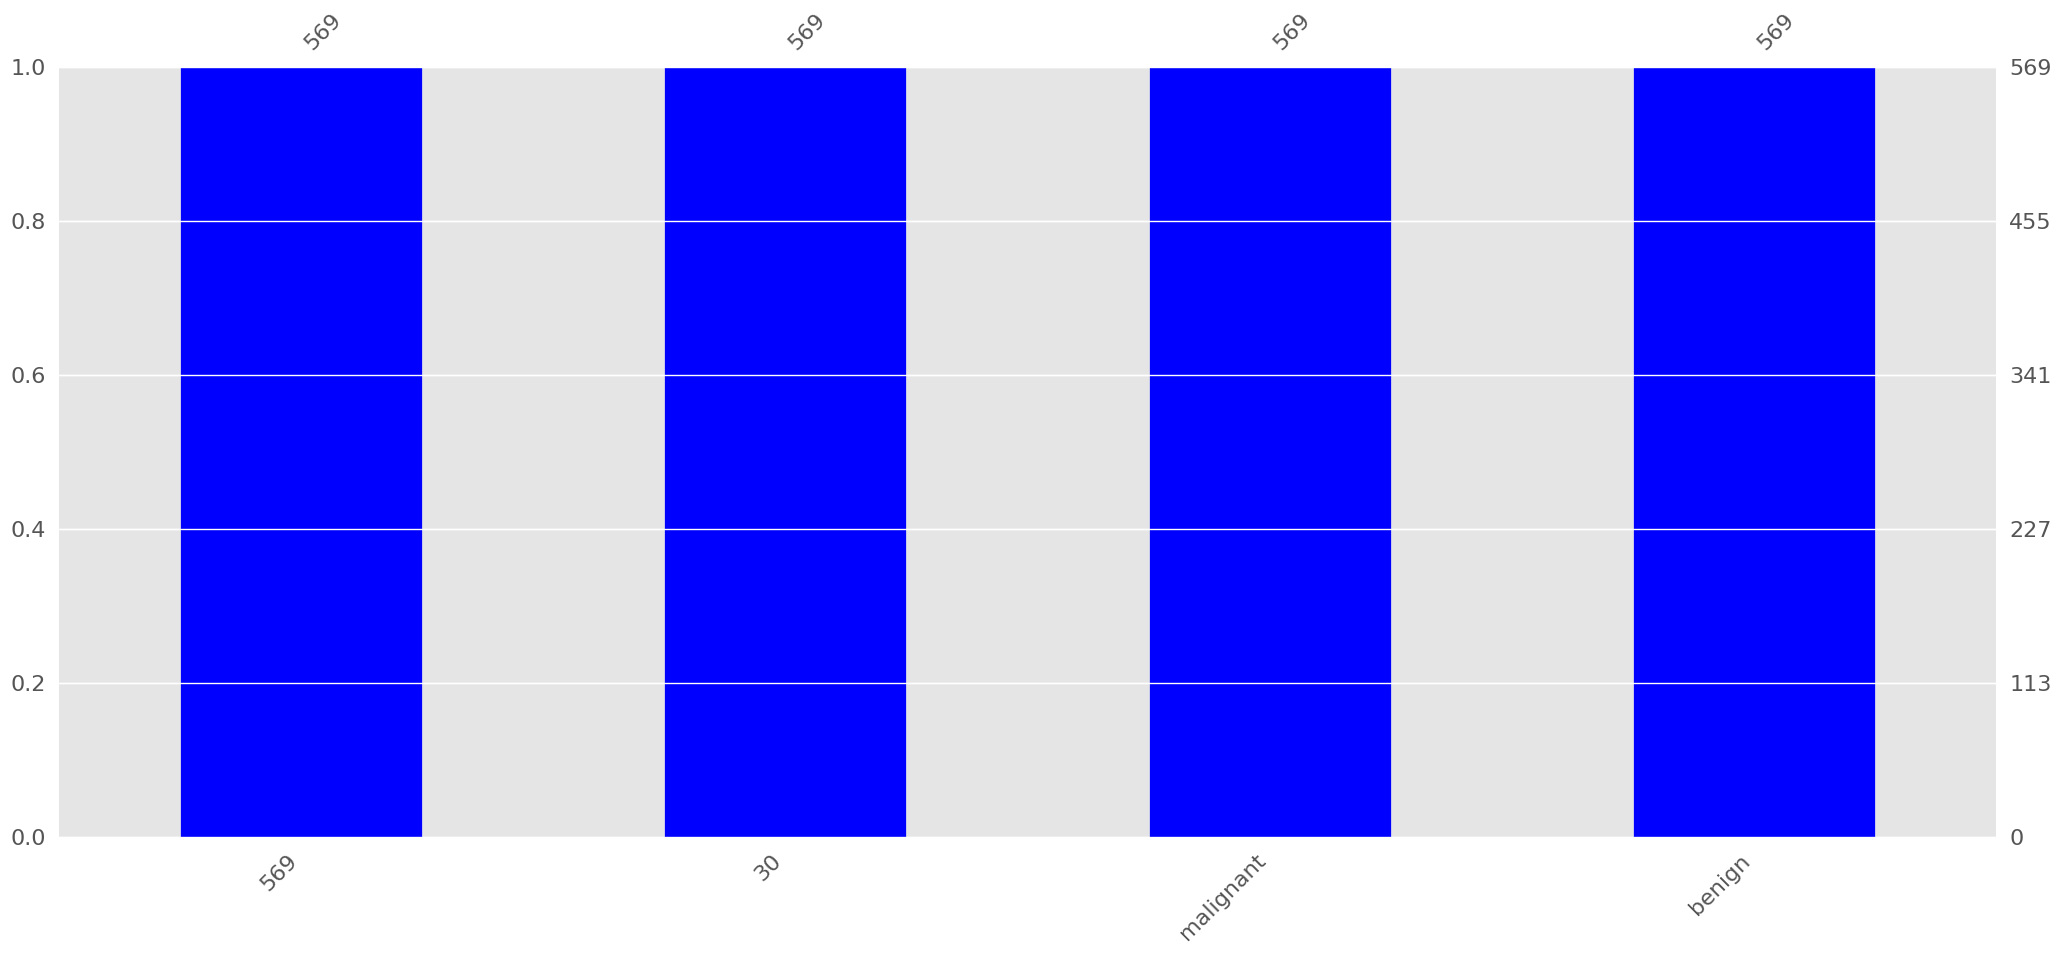

In [ ]:
msno.bar(df, color="blue")

Index(['569', '30', 'malignant', 'benign'], dtype='object')


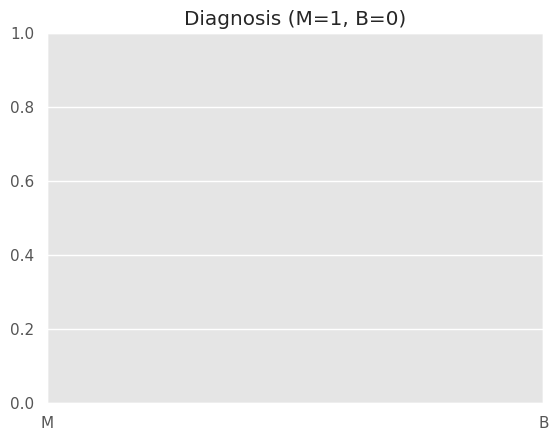

In [85]:
print(df.columns)  # Print the names of all columns in your DataFrame
plt.xticks(np.arange(2), ['M', 'B'])
plt.title('Diagnosis (M=1, B=0)')
plt.show()

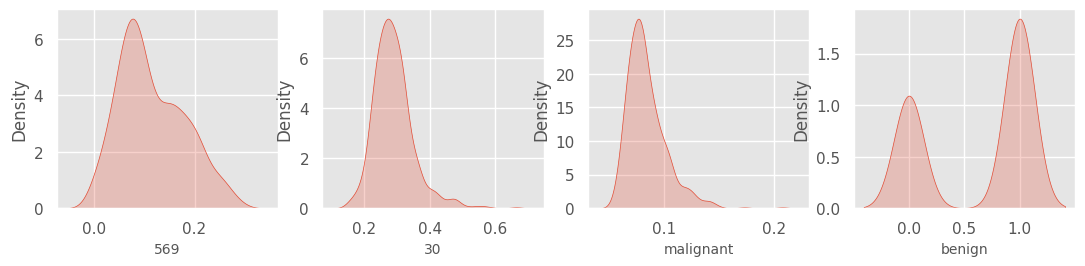

In [88]:
#EDA
#density of graph
plt.figure(figsize=(20,15))
plotnumber = 1  # Initialize plotnumber
for column in df:
  if plotnumber<=30:
    ax= plt.subplot(5,6,plotnumber)
    sns.kdeplot(df[column],fill=True)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()